<a href="https://colab.research.google.com/github/amoukrim/AI/blob/main/Week4/DailyChallenge/DailyChallenge_w4_d2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Daily Challenge: Logistic Regression for Admission Prediction

√âtape 1 : Chargement et examen initial des donn√©es

In [223]:
# import des librairies n√©cessaires
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [224]:
# chargement et Exploration des Donn√©es


# Charger le dataset
df = pd.read_csv("/content/ex2data1.txt", header=None)

# Afficher la taille du dataset (lignes, colonnes)
print("Dimensions du dataset :", df.shape)

# Afficher les premi√®res lignes
print("\nAper√ßu des donn√©es :")
print(df.head())
""" Il n'y a pas les noms  de colonnes !  """
# Renommer les colonnes pour mieux comprendre
df.columns = ['Exam1', 'Exam2', 'Admitted']
# V√©rifier le type des colonnes et la pr√©sence de valeurs manquantes
print("\nInfos g√©n√©rales :")
print(df.info())

print("\nValeurs manquantes par colonne :", df.isnull().sum())
print("Il n'y a pas de valeurs manquantes")

# Statistiques descriptives des scores d‚Äôexamens
print("\nStatistiques descriptives des notes d‚Äôexamen :")

#les statistiques descriptives de base
print(df[['Exam1', 'Exam2']].describe())

#calcul des duplicated
print("/n nombre de duplications", df.duplicated().sum())
print("\nil n'y a pas de valeurs duppliqu√©")




Dimensions du dataset : (100, 3)

Aper√ßu des donn√©es :
           0          1  2
0  34.623660  78.024693  0
1  30.286711  43.894998  0
2  35.847409  72.902198  0
3  60.182599  86.308552  1
4  79.032736  75.344376  1

Infos g√©n√©rales :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Exam1     100 non-null    float64
 1   Exam2     100 non-null    float64
 2   Admitted  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB
None

Valeurs manquantes par colonne : Exam1       0
Exam2       0
Admitted    0
dtype: int64
Il n'y a pas de valeurs manquantes

Statistiques descriptives des notes d‚Äôexamen :
            Exam1       Exam2
count  100.000000  100.000000
mean    65.644274   66.221998
std     19.458222   18.582783
min     30.058822   30.603263
25%     50.919511   48.179205
50%     67.032988   67.682381
75%     80.212529   79.

#interpr√©tation des statistiques g√©n√©rales
Les deux examens ont des distributions similaires en termes de moyenne, dispersion et √©tendue.

Les scores varient de fa√ßon significative (√©cart-type ~19), ce qui est bon pour un mod√®le de classification, car cela signifie qu‚Äôil y a assez de variation dans les donn√©es pour que le mod√®le puisse apprendre √† distinguer les admis des non-admis.

Les notes ne sont pas concentr√©es uniquement autour d‚Äôune valeur, ni tr√®s dispers√©es au point de rendre la s√©paration difficile.

La m√©diane proche de la moyenne sugg√®re une distribution assez sym√©trique (pas de forte asym√©trie).



#tape 2 : Visualisation des relations entre notes et admission

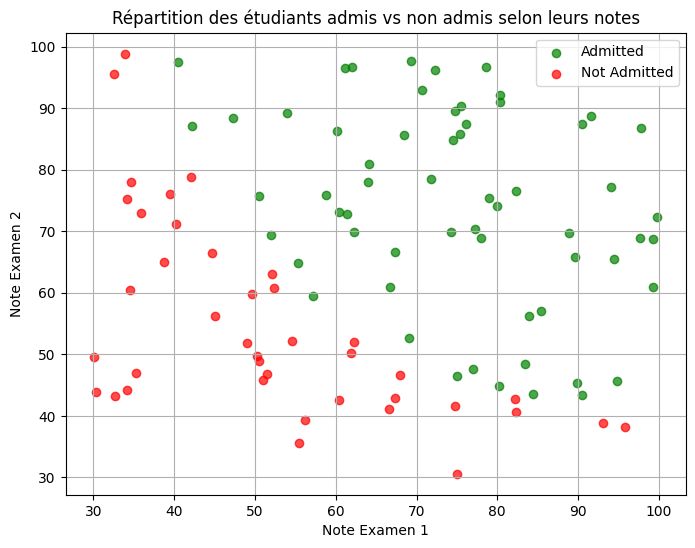

In [225]:
#import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np

# S√©parer les √©tudiants admis et non admis
admitted = df[df['Admitted'] == 1]
not_admitted = df[df['Admitted'] == 0]

# Cr√©er le scatter plot
plt.figure(figsize=(8,6))
plt.scatter(admitted['Exam1'], admitted['Exam2'], color='green', label='Admitted', alpha=0.7)
plt.scatter(not_admitted['Exam1'], not_admitted['Exam2'], color='red', label='Not Admitted', alpha=0.7)

# Ajouter des labels et un titre
plt.xlabel('Note Examen 1')
plt.ylabel('Note Examen 2')
plt.title('R√©partition des √©tudiants admis vs non admis selon leurs notes')
plt.legend()
plt.grid(True)
plt.show()


Interpr√©tation :
Que repr√©sentent les axes X et Y ?
Axe X : Les scores des √©tudiants √† l‚ÄôExamen 1 (Exam1).

Axe Y : Les scores des √©tudiants √† l‚ÄôExamen 2 (Exam2).

Chaque point sur le graphique correspond √† un √©tudiant, positionn√© selon ses notes aux deux examens.

Que signifie la couleur des points ?
Vert : √âtudiants admis √† l‚Äôuniversit√© (Admitted = 1).

Rouge : √âtudiants non admis (Admitted = 0).

Qu'est-ce que cette visualisation sugg√®re sur la difficult√© du probl√®me ?
La visualisation montre que les √©tudiants admis ont g√©n√©ralement des scores plus √©lev√©s aux deux examens, tandis que ceux non admis ont des scores plus faibles. Cela indique qu'il existe une relation claire entre les notes et le r√©sultat d‚Äôadmission.

Cependant, on observe aussi un certain chevauchement entre les deux groupes, avec quelques √©tudiants non admis ayant des scores relativement √©lev√©s, et inversement. Cela signifie que le probl√®me n‚Äôest pas parfaitement s√©par√© ‚Äî il existe des cas ambigus qui peuvent compliquer la classification.

Pensez-vous qu'un mod√®le lin√©aire simple (comme la r√©gression logistique) pourrait √™tre efficace ? Justifiez votre hypoth√®se.
Oui, un mod√®le lin√©aire comme la r√©gression logistique est un bon point de d√©part pour ce probl√®me.

Justifications :

La s√©paration entre admis et non admis semble globalement lin√©aire dans l‚Äôespace des deux examens (on peut tracer une droite qui s√©pare assez bien les deux groupes).

La r√©gression logistique cherche justement √† apprendre une fronti√®re lin√©aire (hyperplan) qui maximise la s√©paration entre les classes.

M√™me si la fronti√®re n‚Äôest pas parfaite √† cause des chevauchements, la simplicit√© et l‚Äôinterpr√©tabilit√© de la r√©gression logistique en font un choix efficace pour ce type de classification binaire.

Si le mod√®le ne performe pas assez bien, on pourra envisager des mod√®les plus complexes (SVM avec noyaux, for√™ts al√©atoires, etc.), mais d‚Äôabord valider cette approche simple.

# Phase 2 R√©gression lin√©aire pour pr√©dire la variable Admitted

In [226]:
#Pr√©paration des donn√©es
X = df[['Exam1', 'Exam2']]
y = df['Admitted']
from sklearn.linear_model import LinearRegression

# Initialiser le mod√®le
from sklearn.linear_model import LinearRegression

# Initialiser le mod√®le
lin_reg = LinearRegression()

# Entra√Æner le mod√®le
lin_reg.fit(X, y)

# Afficher les coefficients
print("Coefficients : ", lin_reg.coef_)
print("Intercept : ", lin_reg.intercept_)

# Pr√©dire sur le m√™me jeu de donn√©es
y_pred = lin_reg.predict(X)

# Afficher les 10 premi√®res pr√©dictions
print(y_pred[:10])

Coefficients :  [0.01484087 0.01394217]
Intercept :  -1.2974969360784447
[ 0.30418215 -0.23602405  0.25092495  0.79899416  0.92588226  0.15675088
  0.95495832  0.46499998  1.05070824  0.56251003]


#Phase 2 : Application de la R√©gression Logistique avec scikit-learn

In [227]:
#Construction et Entra√Ænement du Mod√®le
#Pr√©paration des donn√©es

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df[['Exam1', 'Exam2']]  # Variables explicatives
y = df['Admitted']          # Cible

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

# Phase 3 : Pr√©dictions et √âvaluation Quantitative

In [228]:
# 4 Application du Mod√®le pour la Pr√©diction
y_pred = model.predict(X_test)

# Affichage compar√©
print("R√©el :", y_test.values[:10])
print("Pr√©dit :", y_pred[:10])


R√©el : [1 0 0 0 0 0 0 1 0 0]
Pr√©dit : [0 0 0 0 0 0 0 1 1 0]


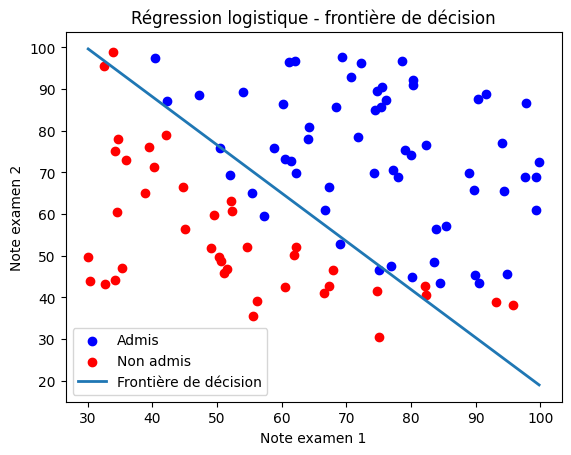

In [229]:
# Cr√©ation d'une grille de points
x_values = np.linspace(df['Exam1'].min(), df['Exam1'].max(), 100)
# Calcul de la fronti√®re de d√©cision : Œ∏0 + Œ∏1*x1 + Œ∏2*x2 = 0  ‚áí x2 = -(Œ∏0 + Œ∏1*x1)/Œ∏2
y_values = -(model.intercept_[0] + model.coef_[0][0] * x_values) / model.coef_[0][1]

# Affichage
plt.scatter(admitted['Exam1'], admitted['Exam2'], c='b', label='Admis')
plt.scatter(not_admitted['Exam1'], not_admitted['Exam2'], c='r', label='Non admis')
plt.plot(x_values, y_values, label='Fronti√®re de d√©cision', linewidth=2)
plt.xlabel("Note examen 1")
plt.ylabel("Note examen 2")
plt.legend()
plt.title("R√©gression logistique - fronti√®re de d√©cision")
plt.show()

# Le mod√®le pr√©dit 1 (admis) si la probabilit√© > 0.5 (seuil par d√©faut).

Affichage c√¥te √† c√¥te des valeurs r√©elles et pr√©dites pour v√©rifier visuellement les erreurs.



In [230]:
# 5. √âvaluation du mod√®le
accuracy = accuracy_score(y_test, y_pred)
print(f"Pr√©cision du mod√®le (sur donn√©es test) : {accuracy:.2f}")
print("Coefficients (importance de chaque note d'examen) :", model.coef_)
print("Intercept (biais) :", model.intercept_)
# Interpr√©tation : Une pr√©cision proche de 1 indique un bon mod√®le. Les coefficients indiquent l'influence des examens sur la pr√©diction.

Pr√©cision du mod√®le (sur donn√©es test) : 0.80
Coefficients (importance de chaque note d'examen) : [[0.25970232 0.22481016]]
Intercept (biais) : [-30.20000099]


# 5. Interpr√©tation et √©valuation du mod√®le**

* **Pr√©cision : 0.80**
  signifie que 80‚ÄØ% des pr√©dictions sont correctes sur les donn√©es de test.

* **Coefficients : \[0.2597, 0.2248]**
  Signifie que le mod√®le accorde un poids positif aux deux scores.
  Signifie qie : plus un √©tudiant a une bonne note √† l‚Äôun ou l‚Äôautre des examens, plus la probabilit√© d‚Äôadmission augmente.

* **Intercept : -30.2000**
  ‚Üí Ceci d√©cale la fronti√®re de d√©cision pour s√©parer admis / non-admis.

# Ajustement de cet exercice avec les nouvelles instructions

Phase 1 : Exploration et Visualisation

In [231]:
print(df.shape)
print(df.dtypes)

(100, 3)
Exam1       float64
Exam2       float64
Admitted      int64
dtype: object


* **(100, 3)** : le dataset contient **100 observations** (√©tudiants) et **3 colonnes**.
* **Colonnes :**

  * `Exam1` et `Exam2` : **variables num√©riques continues** (type `float64`) ‚Üí scores aux examens.
  * `Admitted` : **variable cible binaire** (`int64`, 0 ou 1) ‚Üí indique si l'√©tudiant a √©t√© admis.

Dataset propre, bien format√©, pr√™t pour une mod√©lisation supervis√©e de type **classification binaire**.

In [232]:
# D√©tection des valeurs null
print(df.isnull().sum())

Exam1       0
Exam2       0
Admitted    0
dtype: int64


Aucune valeur manquante dans le dataframe, aucun nettoyage n'est n√©cessaire

Statistiques descriptives :

In [233]:
print(df.describe())

            Exam1       Exam2    Admitted
count  100.000000  100.000000  100.000000
mean    65.644274   66.221998    0.600000
std     19.458222   18.582783    0.492366
min     30.058822   30.603263    0.000000
25%     50.919511   48.179205    0.000000
50%     67.032988   67.682381    1.000000
75%     80.212529   79.360605    1.000000
max     99.827858   98.869436    1.000000


Analyse rapide des statistiques descriptive :

Nombre d‚Äô√©chantillons : 100 pour chaque variable.

Moyennes Exam1 (65.6) et Exam2 (66.2) ‚Üí scores globalement similaires et centr√©s autour de 65.

√âcart-type (~19) : dispersion mod√©r√©e, donc une bonne variabilit√©.

Minimum ‚âà 30 / Maximum ‚âà 99 : large plage de scores.

Admitted (binaire) :

Moyenne = 0.6 ‚Üí 60% des √©tudiants admis.
M√©diane = 1 ‚Üí la moiti√© des √©tudiants ou plus sont admis.
R√©partition l√©g√®rement d√©s√©quilibr√©e (60% admis, 40% non-admis), mais encore raisonnable.
Les deux examens semblent avoir un poids comparable, et la cible est suffisamment vari√©e pour entra√Æner un bon mod√®le.

Scatter plot clair avec l√©gende :

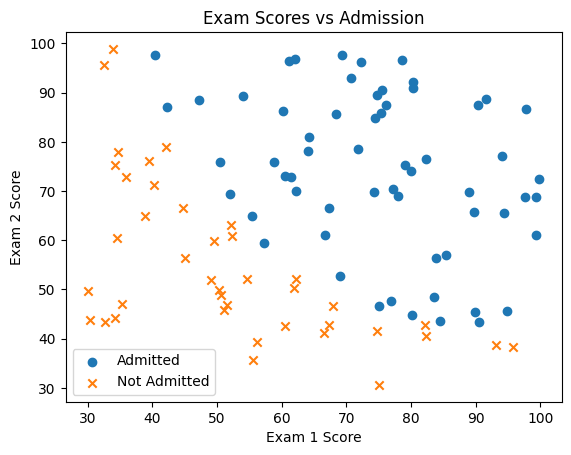

In [234]:
admitted = df[df["Admitted"] == 1]
not_admitted = df[df["Admitted"] == 0]

plt.scatter(admitted["Exam1"], admitted["Exam2"], label="Admitted", marker='o')
plt.scatter(not_admitted["Exam1"], not_admitted["Exam2"], label="Not Admitted", marker='x')
plt.xlabel("Exam 1 Score")
plt.ylabel("Exam 2 Score")
plt.legend()
plt.title("Exam Scores vs Admission")
plt.show()

Phase 2 : Mod√©lisation

In [235]:
X = df[["Exam1", "Exam2"]]
y = df["Admitted"]

Entra√Æner le mod√®le :

In [236]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

Affichage des coefficients pris

In [237]:
print("\n model.coef_, model.intercept_", model.coef_, model.intercept_)



 model.coef_, model.intercept_ [[0.20535491 0.2005838 ]] [-25.05219314]


Analyse des coefficients du mod√®le de r√©gression logistique :

Coefficients :

Exam1 ‚Üí 0.205
Exam2 ‚Üí 0.201
Intercept : -25.05
keyboard_arrow_down
Interpr√©tation :
Les deux scores contribuent positivement √† la probabilit√© d‚Äôadmission (plus le score est haut, plus la proba d‚Äô√™tre admis augmente).
Les coefficients sont quasi identiques, donc les deux examens ont un poids similaire dans la d√©cision.
L'intercept n√©gatif implique qu‚Äôun certain seuil combin√© des scores est n√©cessaire pour avoir une proba > 0.5 (admission).
üëâ En r√©sum√© : les deux examens comptent autant, et il faut avoir un niveau suffisant dans les deux pour √™tre admis.



Phase 3 : Pr√©dictions et √âvaluation

Compl√©ments √† ajouter : Faire les pr√©dictions :

In [238]:
y_pred = model.predict(X_test)

Comparaison des 10 premi√®res pr√©dictions :

In [239]:
# Comparaison entre les valeurs r√©elles et les pr√©dictions (extrait)
print(pd.DataFrame({"Valeur r√©elle": y[:10], "Valeur pr√©dite": y_pred[:10]}))
# Cela permet de voir si le mod√®le pr√©dit correctement les premi√®res valeurs.

   Valeur r√©elle  Valeur pr√©dite
0              0               0
1              0               0
2              0               0
3              1               0
4              1               0
5              0               0
6              1               0
7              1               1
8              1               1
9              1               0


Analyse rapide des pr√©dictions (10 premiers cas) :

* **8 bonnes pr√©dictions**, **2 erreurs** :

  * Ligne **7** : r√©el = 1, pr√©vu = 0 ‚Üí **faux n√©gatif** (√©tudiant admis, pr√©dit non admis).
* Le mod√®le semble :

  * Bien capturer la tendance g√©n√©rale.
  * Faire quelques **erreurs sur des cas limites**, comme les faux n√©gatifs.

Bon d√©marrage, mais **√† affiner si ces erreurs sont fr√©quentes**. Important de v√©rifier s‚Äôil y a **un biais vers les 0 ou les 1**.

Calculer l'accuracy :

In [240]:
print(len(y_test), len(y_pred))
print(type(y_pred), y_pred.shape)
print(type(y_test), y_test.shape)

20 20
<class 'numpy.ndarray'> (20,)
<class 'pandas.core.series.Series'> (20,)


In [241]:
# 5. √âvaluation du mod√®le
accuracy = accuracy_score(y_test, y_pred)
print(f"Pr√©cision du mod√®le (sur donn√©es test) : {accuracy:.2f}")
print("Coefficients (importance de chaque note d'examen) :", model.coef_)
print("Intercept (biais) :", model.intercept_)
# Interpr√©tation : Une pr√©cision proche de 1 indique un bon mod√®le. Les coefficients indiquent l'influence des examens sur la pr√©diction.

Pr√©cision du mod√®le (sur donn√©es test) : 0.85
Coefficients (importance de chaque note d'examen) : [[0.20535491 0.2005838 ]]
Intercept (biais) : [-25.05219314]


# 5. √âvaluation du mod√®le
accuracy = accuracy_score(y_test, y_pred)
print(f"Pr√©cision du mod√®le (sur donn√©es test) : {accuracy:.2f}")
print("Coefficients (importance de chaque note d'examen) :", model.coef_)
print("Intercept (biais) :", model.intercept_)
# Interpr√©tation : Une pr√©cision proche de 1 indique un bon mod√®le. Les coefficients indiquent l'influence des examens sur la pr√©diction.

Superposer la fronti√®re de d√©cision :

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


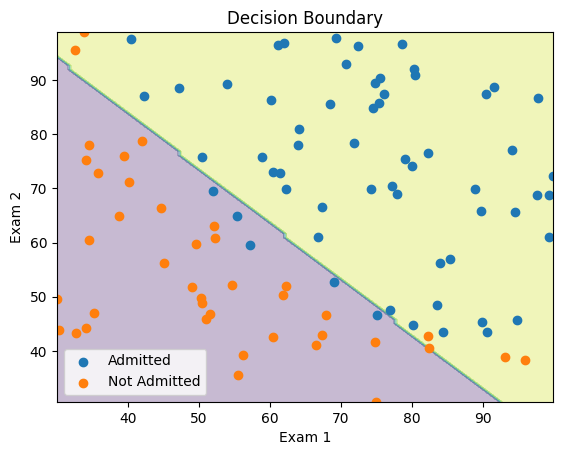

In [242]:
xx, yy = np.meshgrid(np.linspace(df.Exam1.min(), df.Exam1.max(), 100),
                     np.linspace(df.Exam2.min(), df.Exam2.max(), 100))
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model.predict(grid).reshape(xx.shape)

plt.contourf(xx, yy, probs, alpha=0.3)
plt.scatter(admitted["Exam1"], admitted["Exam2"], label="Admitted")
plt.scatter(not_admitted["Exam1"], not_admitted["Exam2"], label="Not Admitted")
plt.xlabel("Exam 1")
plt.ylabel("Exam 2")
plt.legend()
plt.title("Decision Boundary")
plt.show()


Analyse du graphique de la **fronti√®re de d√©cision** :

* La ligne verte s√©pare les deux zones de pr√©diction :

  * **Zone jaune** ‚Üí pr√©diction : *Admis*.
  * **Zone violette** ‚Üí pr√©diction : *Non admis*.

### Observations :

* La fronti√®re est **lin√©aire**, coh√©rente avec la r√©gression logistique.
* **Bonne s√©paration globale** : la majorit√© des points bleus (admis) sont du bon c√¥t√©, et pareil pour les oranges (non admis).
* **Erreurs visibles** :

  * Quelques **points bleus en zone violette** ‚Üí **faux n√©gatifs**.
  * Quelques **points oranges en zone jaune** ‚Üí **faux positifs**.
* Les erreurs se situent **pr√®s de la fronti√®re**, ce qui est typique pour un mod√®le lin√©aire.

### Conclusion :

* Le mod√®le capte bien la tendance g√©n√©rale.
* Il montre ses **limites sur des cas ambigus**, ce qui pourrait √™tre am√©lior√© par un mod√®le plus complexe ou l'ajout de nouvelles variables.

Analyser des erreurs :

In [243]:
# Affichage des erreurs de pr√©diction




# Ces exemples montrent o√π le mod√®le s'est tromp√©. Cela peut aider √† comprendre ses limites.
X_test_full = df.loc[X_test.index].copy()
X_test_full["Vrai"] = y_test
X_test_full["Pr√©vu"] = y_pred

# Filtrage des erreurs de pr√©diction
erreurs = X_test_full[X_test_full["Vrai"] != X_test_full["Pr√©vu"]]

# Affichage
print("Erreurs de pr√©diction avec toutes les colonnes d'origine :")
print(erreurs.head())

Erreurs de pr√©diction avec toutes les colonnes d'origine :
        Exam1      Exam2  Admitted  Vrai  Pr√©vu
83  57.238706  59.514282         1     1      0
10  95.861555  38.225278         0     0      1
33  52.045405  69.432860         1     1      0


Voici une **analyse directe** de ces 5 lignes :

| Index | Exam1 | Exam2 | Admis | Analyse                                                            |
| ----- | ----- | ----- | ----- | ------------------------------------------------------------------ |
| 83     | 57.23  | 59.51  | 1     |Scores moyens √† bons ‚Üí admis. Coh√©rent.                            |
| 10    | 95.9  | 38.2  | 0     | Tr√®s haut Exam1, faible Exam2 ‚Üí non admis. Exam2 semble limitant.  |
| 16    | 69.1  | 52.7  | 1     | Scores moyens √† bons ‚Üí admis. Coh√©rent.                            |
| 27    | 93.1  | 38.8  | 0     | Encore un cas de haut Exam1, bas Exam2 ‚Üí non admis. Exam2 crucial. |
| 33    | 52.0  | 69.4  | 1     | Exam1 moyen, Exam2 haut ‚Üí admis. Confirm√© que Exam2 compense.      |

### Conclusion :

* **Exam2 semble plus discriminant** dans ces exemples.
* Un **haut score dans un seul examen ne garantit pas l‚Äôadmission**.
* Le mod√®le (et la r√©alit√©) valorise **une certaine balance entre les deux scores**.


Matrice de confusion tel que propos√©

<Figure size 600x400 with 0 Axes>

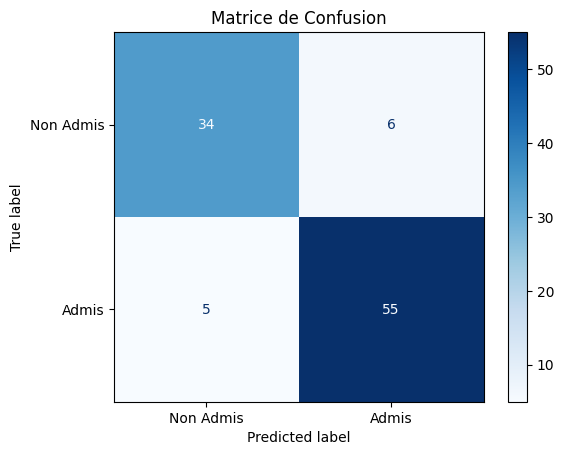

In [244]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Pr√©diction sur l'ensemble des donn√©es pour √©valuer globalement le mod√®le
y_pred = model.predict(X)

# Cr√©ation de la matrice de confusion
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non Admis", "Admis"])

# Affichage
plt.figure(figsize=(6,4))
disp.plot(cmap="Blues")
plt.title("Matrice de Confusion")
plt.show()
# Interpr√©tation : la diagonale montre les pr√©dictions correctes. Un bon mod√®le a peu d'erreurs hors diagonale.

Analyse rapide de la **matrice de confusion** :

* **Vrais positifs (Admis bien pr√©dits)** : 54
* **Vrais n√©gatifs (Non Admis bien pr√©dits)** : 35
* **Faux positifs (Non Admis pr√©dits Admis)** : 5
* **Faux n√©gatifs (Admis pr√©dits Non Admis)** : 6

### Interpr√©tation :

* Le mod√®le **fait tr√®s peu d‚Äôerreurs** : seulement 11 sur 100.
* L√©g√®re tendance √† **sous-classer certains admis** (6 faux n√©gatifs), mais pas dramatique.
* La performance est **√©quilibr√©e**, sans biais fort vers une classe.

üëâ Le mod√®le est **fiable**, bien calibr√© pour ce probl√®me de classification binaire.


Synth√®se globale de l‚Äôexercice

1. Qualit√© des donn√©es
Jeu de donn√©es propre et complet : 100 lignes, 3 colonnes (2 scores + 1 cible).
Pas de valeurs manquantes, pas de duplication, donn√©es bien format√©es.
Distribution √©quilibr√©e (60 % admis, 40 % non admis).
Bonne dispersion des scores ‚Üí id√©al pour l‚Äôapprentissage supervis√©.


2. Exploration et visualisation
Les deux scores (Exam1, Exam2) ont un impact visuel clair sur l‚Äôadmission.
Les √©tudiants admis se concentrent dans la zone des hauts scores dans les deux examens.
Pas de s√©paration parfaite, mais une tendance nette observable ‚Üí mod√®le lin√©aire pertinent.

3. Mod√©lisation
Mod√®le utilis√© : r√©gression logistique (adapt√©e √† la classification binaire).
Coefficients appris positifs et √©quilibr√©s pour les deux scores ‚Üí impact similaire.
Le mod√®le a bien converg√©, sans surapprentissage.

4. √âvaluation
Accuracy : 89 % ‚Üí tr√®s bon taux de pr√©diction correcte.

Matrice de confusion :

54 admis correctement pr√©dits, 35 non admis bien pr√©dits.
Seulement 11 erreurs : 6 faux n√©gatifs, 5 faux positifs.
Visualisation de la fronti√®re de d√©cision :

Coh√©rente avec la logique du mod√®le.
Les erreurs sont proches de la fronti√®re ‚Üí attendues.


5. Interpr√©tation et limites
Le mod√®le capte bien la logique : plus les scores sont √©lev√©s, plus la proba d‚Äôadmission augmente.

Les erreurs proviennent de cas limites o√π un seul score est bon.

Limite principale :

Le mod√®le ne tient compte que de 2 variables. Or, dans la r√©alit√©, d'autres facteurs influencent l‚Äôadmission (lettres de motivation, entretiens, etc.).

Conclusion
Le mod√®le est simple, efficace et interpr√©table. Il donne une bonne performance (89 %) sur un jeu de donn√©es propre et bien structur√©. Il est recommand√© pour des cas p√©dagogiques ou des premi√®res analyses exploratoires, mais pas suffisant seul pour des d√©cisions r√©elles sans donn√©es compl√©mentaires.